In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
# configure matplotlib
%matplotlib notebook
# %matplotlib inline

In [4]:
#mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rc('font',**{'family':'serif'})
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"

In [5]:
from cdi.util.analysis.plotting import plot_comparison, barplot_comparison
from cdi.util.analysis.eval import (compute_avg_loglikelihood_w_std_err,
                                    compute_param_error)

## Analysis setup

### Global settings

In [6]:
data_name = 'fa_frey_processed'
exp_seed_keys = [
    'm20190508_d20200325_20200406_20200407',
    'm2019050811_d2020032511_20200406_20200407',
    'm2019050822_d2020032522_20200406_20200407',
    'm2019050833_d2020032533_20200406_20200407',
    'm2019050844_d2020032544_20200406_20200407',
]

### Templates

In [7]:
log_path_base = f'../../trained_models/{data_name}/learning_experiments'

## Helpers

In [8]:
# ggplot
# colors = ['#000000', '#E24A33', '#988ED5', '#FBC15E', '#348ABD', '#FFB5B8', '#777777', '#8EBA42',]
colors = ['#000000', '#E24A33', '#FBC15E', '#348ABD', '#8EBA42', '#988ED5']

## Generative model analysis

### Log-likelihood analysis

For each method train a number of models using the same complete dataset but different missingness generated by changing only the random seed for the missingness generator. The fitted models are then used to compute fully-observed average log-likelihood on a held-out test dataset. Finally, the results from different seeds are averaged and standard error is computed.

In [9]:
suite = {
#     'Complete MLE': 'fa_complete_data',
    'EM (Complete)': 'fa_em_complete',
    'VGI': 'fa_pretrained_svar_cdi_const',
    'MICE': 'fa_mice_baseline',
    'EM w/ miss': 'fa_em_joint',
    'Emp. imputation': 'fa_empirical_sample_baseline',
}
groups = [1, 2, 3, 4, 5]

<IPython.core.display.Javascript object>


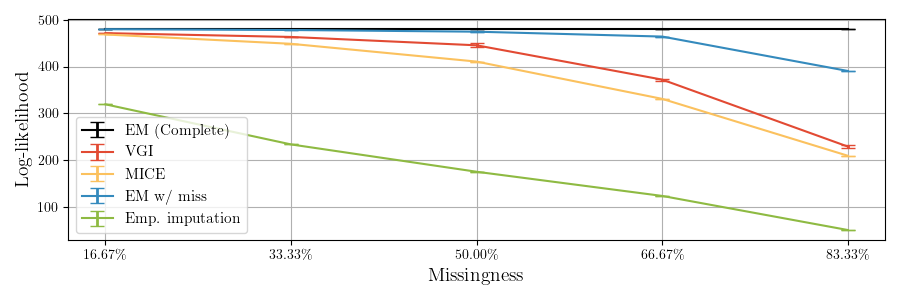

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 3))
# axes.set(title=f'Test log-likelihood')

stats = {}
# Load stats for every experiment in the suite
for exp_name, model_name in suite.items():
    stats[exp_name] = compute_avg_loglikelihood_w_std_err(model_name, 
                                                          seeds=exp_seed_keys,
                                                          groups=groups,
                                                          base_path=log_path_base)

plot_comparison(axes, stats, 
                x_metric_key='group',
                y_metric_keys=('test_log_lik',),  
                err_keys=('test_log_lik_stderr',),
                xlabel='Missingness',
                ylabel='Log-likelihood', 
                colors=colors,
                ylim=None)
#                 x_jitter=x_jitter)

axes.set_xticks(groups)
axes.set_xticklabels(list(f'{g/6*100:.2f}\\%' for g in groups))

fig.tight_layout()

In [17]:
# fig.savefig('figures/fa_frey_test_loglik.pdf', bbox_inches='tight')

#### Bar-plot

In [11]:
suite_line = {
    'EM (Complete)': 'fa_em_complete'
}

suite_bar = {
    'VGI': 'fa_pretrained_svar_cdi_const',
    'MICE': 'fa_mice_baseline',
    'EM w/ miss': 'fa_em_joint',
    'Emp. imputation': 'fa_empirical_sample_baseline',
}
groups = [1, 2, 3, 4, 5]

<IPython.core.display.Javascript object>


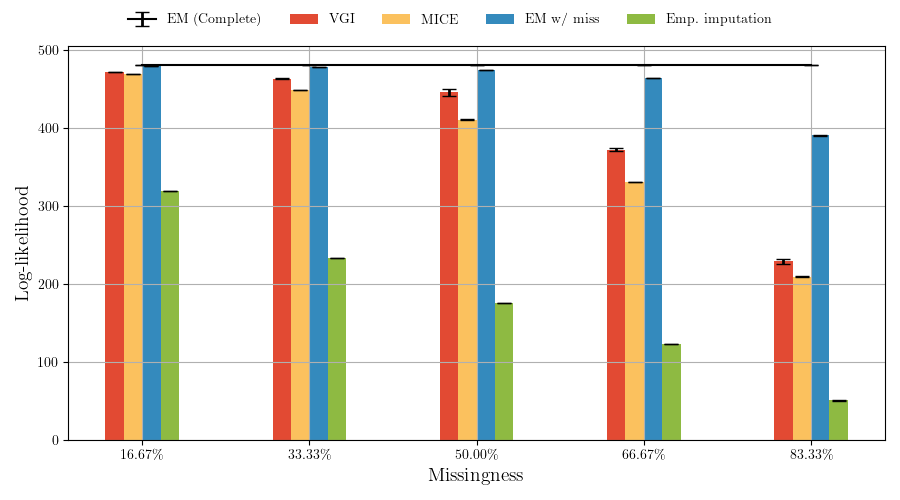

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 5))
# axes.set(title=f'Test log-likelihood')

stats_line = {}
# Load stats for every experiment in the suite
for exp_name, model_name in suite_line.items():
    stats_line[exp_name] = compute_avg_loglikelihood_w_std_err(model_name, 
                                                              seeds=exp_seed_keys,
                                                              groups=groups,
                                                         base_path=log_path_base)
plot_comparison(axes, stats_line,
                x_metric_key='group',
                y_metric_keys=('test_log_lik',),  
                err_keys=('test_log_lik_stderr',),
                xlabel='Missingness',
                ylabel='Log-likelihood', 
                colors=colors,
#                 ylim=(450, 1200)
               )
    
stats_bar = {}
# Load stats for every experiment in the suite
for exp_name, model_name in suite_bar.items():
    stats_bar[exp_name] = compute_avg_loglikelihood_w_std_err(model_name, 
                                                              seeds=exp_seed_keys,
                                                              groups=groups,
                                                              base_path=log_path_base)

barplot_comparison(axes, stats_bar, width=0.11,
                    x_metric_key='group',
                    y_metric_keys=('test_log_lik',),  
                    err_keys=('test_log_lik_stderr',),
                    xlabel='Missingness',
                    ylabel='Log-likelihood', 
                    colors=colors[1:],
#                     ylim=(450, 1200),
#                       gap=0.02, gap_idx=1
                  )

axes.set_xticks(groups)
axes.set_xticklabels(list(f'{g/6*100:.2f}\\%' for g in groups))

axes.grid()

fig.tight_layout(rect=(0, 0, 1, 0.94))

axes.legend(ncol=5, bbox_to_anchor=(0.5, 0.96), bbox_transform=fig.transFigure, loc='center', 
                  frameon=False)

### Learnt parameter analysis

In [9]:
suite = {
#     'Complete MLE': 'fa_complete_data',
    'EM (Complete)': 'fa_em_complete',
    'VGI': 'fa_pretrained_svar_cdi_const',
    'MICE': 'fa_mice_baseline',
#     'MICE ens': 'fa_mice_baseline_ensamble',
    'EM w/ miss': 'fa_em_joint',
#     'MCEM w/ miss': 'fa_mcem_joint',
    'Emp. imputation': 'fa_empirical_sample_baseline',
}
groups = [1, 2, 3, 4, 5]

In [10]:
stats = {}
# Load stats for every experiment in the suite
for exp_name, model_name in suite.items():
    stats[exp_name] = compute_param_error(model_name,
                                          seeds=exp_seed_keys,
                                          groups=groups,
                                          base_path=log_path_base,
                                          checkpoints='last')

#### $\mu$ RMSE

<IPython.core.display.Javascript object>


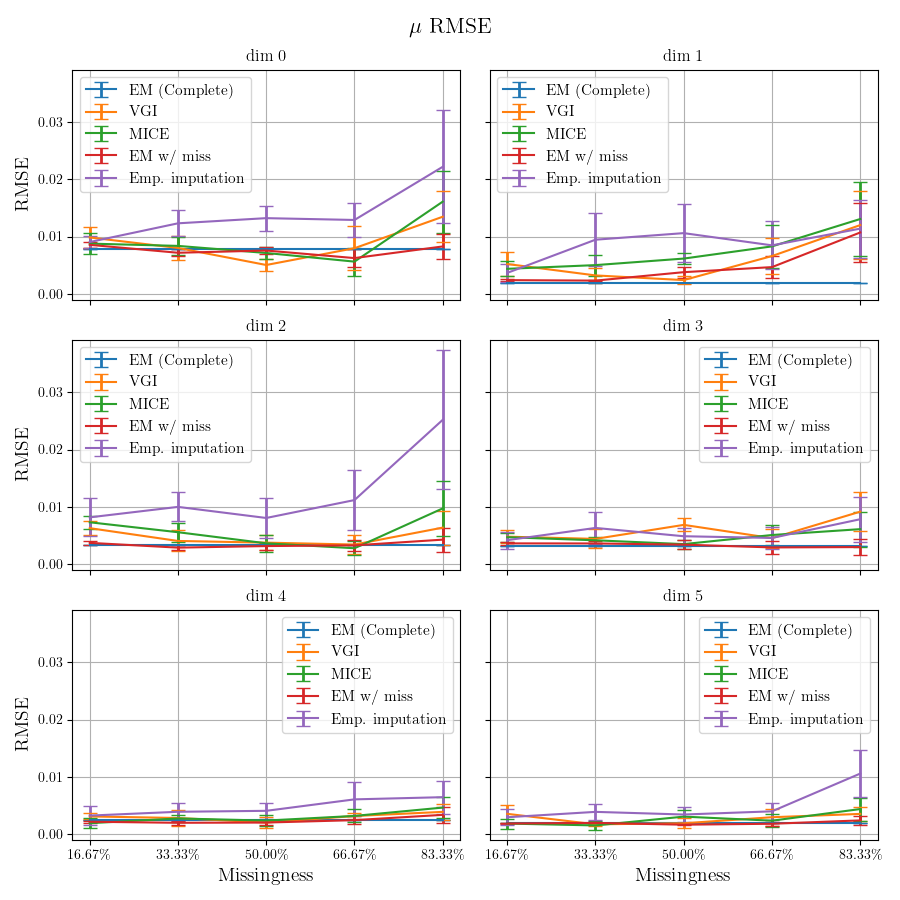

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(9, 9))
fig.suptitle('$\\mathbf{\\mu}$ RMSE', fontsize=16)
axes = axes.flatten()
for i in range(6):
    if i in (0,2,4):
        ylabel = 'RMSE'
    else:
        ylabel = None

    if i in (4,5):
        xlabel = 'Missingness'
    else:
        xlabel = None
        
    axes[i].set(title=f'dim {i}')
    plot_comparison(axes[i], stats, 
                    x_metric_key='group',
                    y_metric_keys=('mean_rmse',),
                    y_metric_dim=i,
                    err_keys=('mean_std_err',),
                    err_metric_dim=i,
                    xlabel=xlabel,
                    ylabel=ylabel, 
                    ylim=None)
#                     legend=i==0)

    axes[i].set_xticks(groups)
    axes[i].set_xticklabels(list(f'{g/6*100:.2f}\\%' for g in groups))

fig.tight_layout()

#### $\sigma$ RMSE

<IPython.core.display.Javascript object>


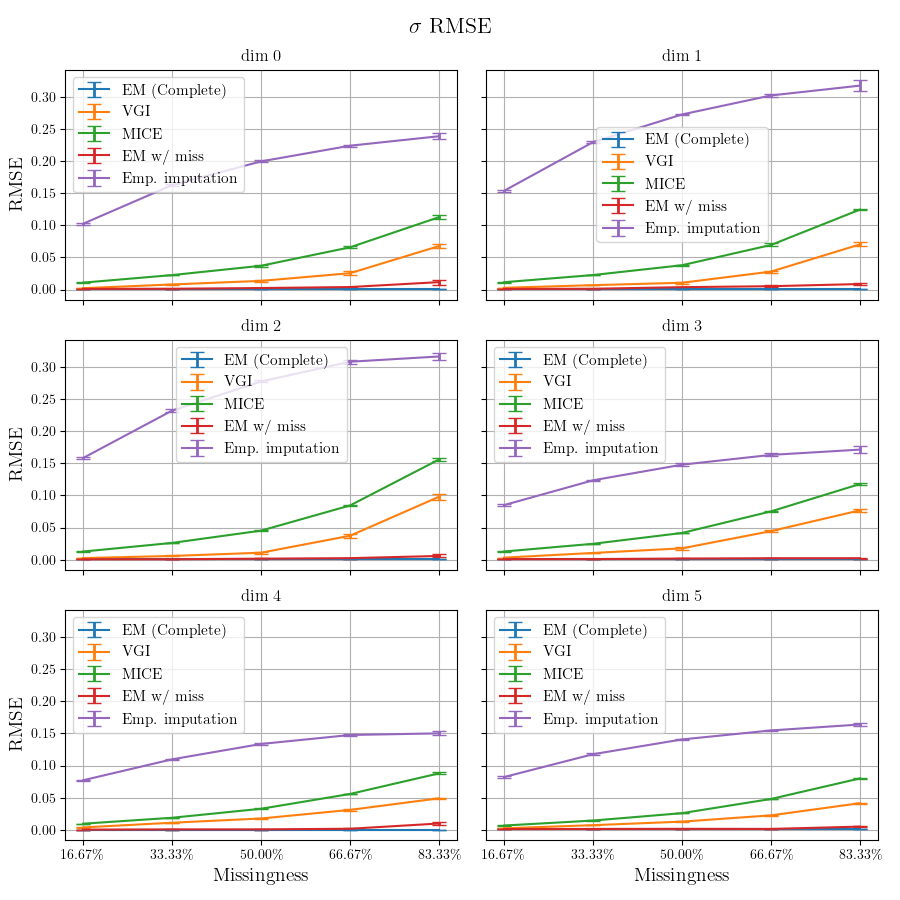

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(9, 9))
fig.suptitle('$\\mathbf{\\sigma}$ RMSE', 
             fontsize=16)
axes = axes.flatten()
for i in range(6):
    if i in (0,2,4):
        ylabel = 'RMSE'
    else:
        ylabel = None

    if i in (4,5):
        xlabel = 'Missingness'
    else:
        xlabel = None
        
    axes[i].set(title=f'dim {i}')
    plot_comparison(axes[i], stats, 
                    x_metric_key='group',
                    y_metric_keys=('std_rmse',),
                    y_metric_dim=i,
                    err_keys=('std_std_err',),
                    err_metric_dim=i,
                    xlabel=xlabel,
                    ylabel=ylabel, 
                    ylim=None)
#                     legend=i==0)

    axes[i].set_xticks(groups)
    axes[i].set_xticklabels(list(f'{g/6*100:.2f}\\%' for g in groups))

fig.tight_layout()

#### Bures distance of $\Sigma$

In [25]:
# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
# axes.set(title=f'$\\Sigma$')

# plot_comparison(axes, stats, 
#                 x_metric_key='group',
#                 y_metric_keys=('cov_bures_avg',),  
#                 err_keys=('cov_bures_std_err',),
#                 xlabel='Missingness',
#                 ylabel='Bures', 
#                 ylim=None)

# axes.set_xticks(groups)
# axes.set_xticklabels(list(f'{g/6*100:.2f}\\%' for g in groups))

# fig.tight_layout()

#### Wasserstein distance

In [26]:
# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 3))
# # axes.set(title='$\\mathcal{W}(p_{\mathbf{\\theta}}, p_*)$')

# plot_comparison(axes, stats, 
#                 x_metric_key='group',
#                 y_metric_keys=('W_avg',),  
#                 err_keys=('W_std_err',),
#                 xlabel='Missingness',
#                 ylabel='$\\mathcal{W}(p_{\\mathbf{\\theta}}, p_*)$', 
#                 ylim=None)

# axes.set_xticks(groups)
# axes.set_xticklabels(list(f'{g/6*100:.2f}\\%' for g in groups))

# fig.tight_layout()

In [27]:
# fig.savefig('figures/fa_frey_mcar_wass_dist.pdf', bbox_inches='tight')

#### $D_\text{KL}$

<IPython.core.display.Javascript object>


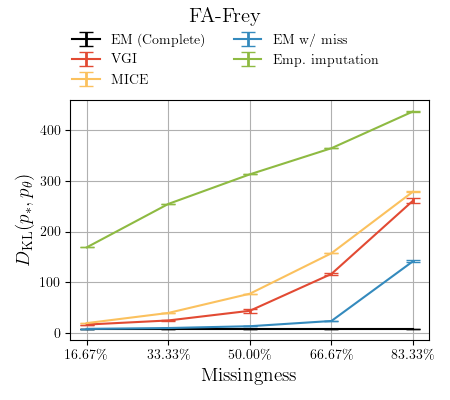

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4.5, 4))
# axes.set(title='$\\mathcal{W}(p_{\mathbf{\\theta}}, p_*)$')

plot_comparison(axes, stats, 
                x_metric_key='group',
                y_metric_keys=('KLD_avg',),  
                err_keys=('KLD_std_err',),
                xlabel='Missingness',
                ylabel='$D_{\\mathrm{KL}}(p_*, p_{\\mathbf{\\theta}})$', 
                colors=colors,
                ylim=None)

axes.set_xticks(groups)
axes.set_xticklabels(list(f'{g/6*100:.2f}\\%' for g in groups))

# fig.tight_layout()

fig.suptitle('FA-Frey', fontsize=15)

fig.tight_layout(rect=(0, 0, 1, 0.87))

axes.legend(ncol=2, bbox_to_anchor=(0.5, 0.85), bbox_transform=fig.transFigure, loc='center', 
                  frameon=False)

In [18]:
# fig.savefig('figures/fa_frey_kldiv_small.pdf', bbox_inches='tight')

### KL-div for MCEM

In [12]:
suite = {
#     'Complete MLE': 'fa_complete_data',
    'EM (Complete)': 'fa_em_complete',
    'VGI': 'fa_pretrained_svar_cdi_const',
#     'MICE': 'fa_mice_baseline',
#     'MICE ens': 'fa_mice_baseline_ensamble',
    'EM w/ miss': 'fa_em_joint',
    'MCEM w/ miss': 'fa_mcem_joint',
#     'Emp. imputation': 'fa_empirical_sample_baseline',
}
# groups = [1, 2, 3, 4, 5]
groups = [1, 3, 5]

In [13]:
stats = {}
# Load stats for every experiment in the suite
for exp_name, model_name in suite.items():
    stats[exp_name] = compute_param_error(model_name,
                                          seeds=[exp_seed_keys[0]],
                                          groups=groups,
                                          base_path=log_path_base,
                                          checkpoints='last'
                                         )

/home/vaidas/miniconda3/envs/cdi/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/vaidas/miniconda3/envs/cdi/lib/python3.8/site-packages/numpy/core/_methods.py:251: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/home/vaidas/miniconda3/envs/cdi/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


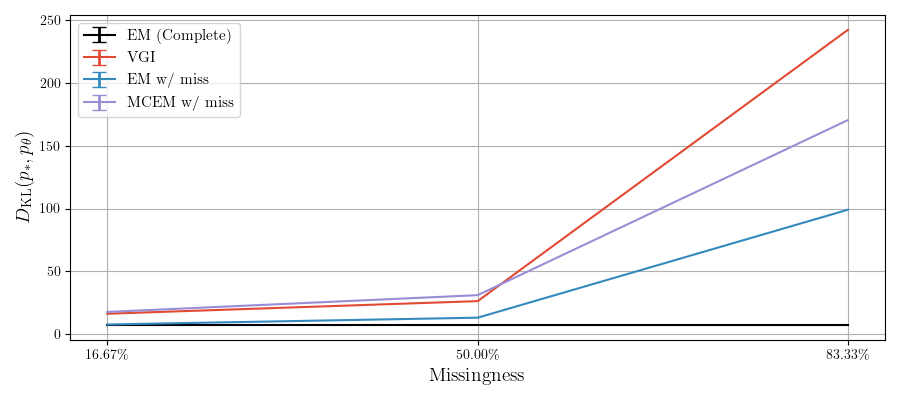

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
# axes.set(title='$\\mathcal{W}(p_{\mathbf{\\theta}}, p_*)$')

plot_comparison(axes, stats, 
                x_metric_key='group',
                y_metric_keys=('KLD_avg',),  
                err_keys=('KLD_std_err',),
                xlabel='Missingness',
                ylabel='$D_{\\mathrm{KL}}(p_*, p_{\\mathbf{\\theta}})$', 
                colors=colors[:2] + colors[3:4] + colors[5:],
                ylim=None)

axes.set_xticks(groups)
axes.set_xticklabels(list(f'{g/6*100:.2f}\\%' for g in groups))
# axes.set_title('FA-Frey', fontsize=15)

fig.tight_layout()



# fig.tight_layout(rect=(0, 0, 1, 0.87))

# axes.legend(ncol=2, bbox_to_anchor=(0.5, 0.85), bbox_transform=fig.transFigure, loc='center', 
#                   frameon=False)

In [44]:
# fig.savefig('figures/fa_frey_kldiv_mcem.pdf', bbox_inches='tight')